# CASE - LEANDRO BARROS GIMENEZ

A base de dados PENSE 2015 (Pequisa Nacional de Saúde do Escolar) foi organizada com base em questionários preenchidos por mais de 100 mil estudantes brasileiros de todo o país, com suas percepções sobre saúde, violência, ambiente familiar, nutrição, comportamento de risco e prática de atividade física, entre outros. Gostaríamos explorar esta base de dados para obtenção de insights para saúde pública no Brasil. Vídeo explicativo em
https://www.youtube.com/watch?v=z4BBCHZUvD4
Informações detalhadas sobre a base PENSE 2015 pode ser encontrada nesta página:
https://ww2.ibge.gov.br/home/estatistica/populacao/pense/2015/default.shtm

Os dados podem ser baixados no item MICRODADOS no menu à esquerda, ou em:
ftp://ftp.ibge.gov.br/pense/2015/microdados/

Nota: utilizar a AMOSTRA1 (escolares frequentando 9o ano ensino fundamental).

## Pergunta selecionada:

Que características influenciam os hábitos alimentares dos adolescentes?

# 1. Carregando base de dados

## 1. a) Importando as bibliotecas e dados

In [1]:
import pandas as pd
from datetime import datetime
import re
import numpy as np

from os import listdir
from os.path import isfile, join

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 400)

In [2]:
mypath = 'C:\\Users\\gimen\Desktop\\vaga albert einstein\\arquivos csv'

In [3]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [4]:
print(onlyfiles)

['Dicionario_PENSE_Microdados_Amostra1.xls', 'META_DADOS.xlsx', 'PENSE_AMOSTRA1_ALUNO.CSV', 'PENSE_AMOSTRA1_ALUNOESCOLA.CSV', 'PENSE_AMOSTRA1_ESCOLA.CSV', '~$META_DADOS.xlsx']


In [5]:
df_aluno = pd.read_csv(mypath+'\\PENSE_AMOSTRA1_ALUNO.CSV', sep=';')
df_aluno_escola = pd.read_csv(mypath+'\\PENSE_AMOSTRA1_ALUNOESCOLA.CSV', sep=';')
df_escola = pd.read_csv(mypath+'\\PENSE_AMOSTRA1_ESCOLA.CSV', sep=';')

In [6]:
df_aluno.shape

(102072, 174)

In [7]:
df_aluno.head()

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,VB02022,VB02023,VB02024,VB02025,VB02026,VB02027,VB03001A1,VB03001A2,VB03002A1,VB03002A2,VB03003A,VB03005A,VB03006A,VB03007,VB03008,VB03009A,VB03010A,VB03011A,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB04001,VB04002,VB04003,VB04005,VB04006A,VB04008A,VB04009,VB04010,VB04011,VB05002,VB05003,VB05004,VB05005,VB05006A,VB05007,VB05009,VB05010,VB06001,VB06002,VB06003A,VB06004A,VB06005A,VB06006,VB07001,VB07002,VB07003,VB07004,VB07005,VB07006,VB07007,VB07008,VB07009,VB07010,VB08001,VB08002,VB08003A,VB08005,VB08006,VB08007,VB08008,VB08009,VB08010,VB08011,VB08012,VB08013,VB09001,VB09002,VB09003,VB09004,VB09005,VB09006A1,VB09006A2,VB09007A,VB09008,VB09009,VB09010,VB09011,VB09012,VB09013A,VB09014A,VB09015,VB09016,VB0901701,VB0901702,VB0901703,VB0901704,VB0901705,VB0901706,VB10001A,VB10002,VB10003,VB10004,VB10005,VB10006,VB11001,VB11002,VB11003,VB11004A,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,ESTRATO_EXP,ESTRATOGEOREG,PESO,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,2,7,1,2,7,4,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,3,4,5,8,2,5,3,2,5,-1,2,8,2,1,2,3,3,2,6,1,1,2,1,1,-1,2,2,4,1,30.0,30.0,0.0,0.0,0.0,2,-1,-1,1,1,1,-1,-1,-1,1,13,1,1,1,1,1,3,2,-1,-1,-1,-1,6,1,5,1,1,4,5,1,-1,1,2,2,-1,-1,-1,-1,-1,1,1,3,-1,-1,-1,1,1,1,2,2,4,4,6,1,1,1,1,1,1,-1,3,2,-1,-1,-1,-1,-1,-1,5,2,3,4,5,5,3,1,2,2,2,4,3,2,4,3,1,2,3,5,2,-1,1,1,2,2,1,2,2,2,2,2,2,2,110020521,1100205,"3,738463",1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,2,5,1,1,7,3,2,-1,1,1,1,1,1,1,3,1,4,1,1,2,5,3,8,3,8,8,7,2,1,5,1,5,1,3,5,1,7,4,5,8,1,2,-1,2,6,7,7,5,6,3,7,105.0,540.0,45.0,390.0,360.0,2,-1,-1,1,1,4,-1,-1,6,2,1,-1,-1,-1,-1,-1,2,2,-1,-1,-1,-1,2,1,4,3,4,3,3,2,7,2,1,1,12,6,1,1,1,2,1,1,1,1,-1,1,1,1,1,2,6,5,3,3,3,2,8,2,1,-1,2,2,-1,-1,-1,-1,-1,-1,6,2,4,5,5,5,3,4,2,2,2,1,1,1,1,4,1,10,2,1,1,12,1,-1,2,2,2,2,2,1,2,2,2,2,110020521,1100205,"3,738463",2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,10,7,1,1,7,4,2,-1,2,1,1,1,1,2,4,1,4,1,2,2,6,3,1,6,4,3,1,5,1,1,1,-1,2,3,2,1,7,7,7,1,1,-1,-1,1,-1,4,5,5,10,9,4,0.0,135.0,0.0,135.0,180.0,2,-1,-1,1,1,1,-1,-1,-1,2,1,-1,-1,-1,-1,-1,1,2,-1,-1,-1,-1,1,2,5,3,5,1,5,3,7,2,1,2,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,1,1,1,2,2,4,6,1,1,1,1,1,1,1,-1,2,2,-1,-1,-1,-1,-1,-1,5,2,3,5,5,5,4,2,2,2,2,3,4,3,2,4,1,99,1,2,2,99,1,-1,2,2,2,2,1,2,2,2,2,2,110020521,1100205,"3,738463",3,1,1787
3,2015,76,1,11,1100205,1,1,1,4,14,11,6,1,2,7,4,2,-1,2,1,1,1,1,2,4,2,4,1,2,2,5,3,8,4,1,2,8,4,1,5,5,-1,2,4,2,1,3,2,4,1,3,-1,3,2,6,8,7,4,2,1,8,50.0,550.0,45.0,455.0,420.0,2,-1,-1,1,1,1,-1,-1,-1,1,13,1,1,1,1,1,2,2,-1,-1,-1,-1,1,1,5,3,3,1,5,1,-1,1,2,2,-1,-1,-1,-1,-1,1,1,2,-1,-1,-1,1,1,1,2,2,6,5,1,1,1,1,1,1,1,-1,2,2,-1,-1,-1,-1,-1,-1,5,2,3,4,4,4,4,2,2,2,2,3,4,2,1,4,1,2,1,1,2,5,1,-1,2,2,2,2,2,2,1,2,2,2,110020521,1100205,"3,738463",4,1,1787
4,2015,76,1,11,1100205,1,1,1,1,14,12,6,2,1,5,2,2,-1,1,1,1,1,2,2,3,2,4,1,2,2,6,3,2,8,7,8,1,8,5,4,5,-1,2,8,1,1,1,6,2,1,1,-1,-1,1,-1,1,-1,2,2,9,1,0.0,0.0,0.0,0.0,0.0,2,-1,-1,3,1,1,-1,-1,-1,2,1,-1,-1,-1,-1,-1,2,2,-1,-1,-1,-1,1,2,4,3,4,2,4,2,7,1,1,2,-1,-1,-1,-1,-1,3,1,2,-1,-1,-1,1,1,1,2,2,2,2,1,1,1,1,1,1,8,9,1,2,-1,-1,-1,-1,-1,-1,3,2,1,1,5,3,4,2,2,2,2,3,4,4,2,4,2,-1,3,3,2,-1,1,-1,2,2,2,2,2,2,2,1,2,2,110020521,1100205,"3,738463",5,1,1787


## 1. b) Filtrando os alunos do 9 ano

In [8]:
df_9ano = df_aluno.loc[df_aluno_escola['VB01021'] == 4]

In [9]:
df_9ano.shape

(100497, 174)

In [10]:
columns = df_9ano.columns

In [11]:
df_9ano.head()

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,VB02022,VB02023,VB02024,VB02025,VB02026,VB02027,VB03001A1,VB03001A2,VB03002A1,VB03002A2,VB03003A,VB03005A,VB03006A,VB03007,VB03008,VB03009A,VB03010A,VB03011A,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB04001,VB04002,VB04003,VB04005,VB04006A,VB04008A,VB04009,VB04010,VB04011,VB05002,VB05003,VB05004,VB05005,VB05006A,VB05007,VB05009,VB05010,VB06001,VB06002,VB06003A,VB06004A,VB06005A,VB06006,VB07001,VB07002,VB07003,VB07004,VB07005,VB07006,VB07007,VB07008,VB07009,VB07010,VB08001,VB08002,VB08003A,VB08005,VB08006,VB08007,VB08008,VB08009,VB08010,VB08011,VB08012,VB08013,VB09001,VB09002,VB09003,VB09004,VB09005,VB09006A1,VB09006A2,VB09007A,VB09008,VB09009,VB09010,VB09011,VB09012,VB09013A,VB09014A,VB09015,VB09016,VB0901701,VB0901702,VB0901703,VB0901704,VB0901705,VB0901706,VB10001A,VB10002,VB10003,VB10004,VB10005,VB10006,VB11001,VB11002,VB11003,VB11004A,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,ESTRATO_EXP,ESTRATOGEOREG,PESO,aluno,escola,turma
0,2015,76,1,11,1100205,1,1,2,1,14,2,7,1,2,7,4,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,3,4,5,8,2,5,3,2,5,-1,2,8,2,1,2,3,3,2,6,1,1,2,1,1,-1,2,2,4,1,30.0,30.0,0.0,0.0,0.0,2,-1,-1,1,1,1,-1,-1,-1,1,13,1,1,1,1,1,3,2,-1,-1,-1,-1,6,1,5,1,1,4,5,1,-1,1,2,2,-1,-1,-1,-1,-1,1,1,3,-1,-1,-1,1,1,1,2,2,4,4,6,1,1,1,1,1,1,-1,3,2,-1,-1,-1,-1,-1,-1,5,2,3,4,5,5,3,1,2,2,2,4,3,2,4,3,1,2,3,5,2,-1,1,1,2,2,1,2,2,2,2,2,2,2,110020521,1100205,"3,738463",1,1,1787
1,2015,76,1,11,1100205,1,1,1,4,16,2,5,1,1,7,3,2,-1,1,1,1,1,1,1,3,1,4,1,1,2,5,3,8,3,8,8,7,2,1,5,1,5,1,3,5,1,7,4,5,8,1,2,-1,2,6,7,7,5,6,3,7,105.0,540.0,45.0,390.0,360.0,2,-1,-1,1,1,4,-1,-1,6,2,1,-1,-1,-1,-1,-1,2,2,-1,-1,-1,-1,2,1,4,3,4,3,3,2,7,2,1,1,12,6,1,1,1,2,1,1,1,1,-1,1,1,1,1,2,6,5,3,3,3,2,8,2,1,-1,2,2,-1,-1,-1,-1,-1,-1,6,2,4,5,5,5,3,4,2,2,2,1,1,1,1,4,1,10,2,1,1,12,1,-1,2,2,2,2,2,1,2,2,2,2,110020521,1100205,"3,738463",2,1,1787
2,2015,76,1,11,1100205,1,1,1,1,13,10,7,1,1,7,4,2,-1,2,1,1,1,1,2,4,1,4,1,2,2,6,3,1,6,4,3,1,5,1,1,1,-1,2,3,2,1,7,7,7,1,1,-1,-1,1,-1,4,5,5,10,9,4,0.0,135.0,0.0,135.0,180.0,2,-1,-1,1,1,1,-1,-1,-1,2,1,-1,-1,-1,-1,-1,1,2,-1,-1,-1,-1,1,2,5,3,5,1,5,3,7,2,1,2,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,1,1,1,2,2,4,6,1,1,1,1,1,1,1,-1,2,2,-1,-1,-1,-1,-1,-1,5,2,3,5,5,5,4,2,2,2,2,3,4,3,2,4,1,99,1,2,2,99,1,-1,2,2,2,2,1,2,2,2,2,2,110020521,1100205,"3,738463",3,1,1787
3,2015,76,1,11,1100205,1,1,1,4,14,11,6,1,2,7,4,2,-1,2,1,1,1,1,2,4,2,4,1,2,2,5,3,8,4,1,2,8,4,1,5,5,-1,2,4,2,1,3,2,4,1,3,-1,3,2,6,8,7,4,2,1,8,50.0,550.0,45.0,455.0,420.0,2,-1,-1,1,1,1,-1,-1,-1,1,13,1,1,1,1,1,2,2,-1,-1,-1,-1,1,1,5,3,3,1,5,1,-1,1,2,2,-1,-1,-1,-1,-1,1,1,2,-1,-1,-1,1,1,1,2,2,6,5,1,1,1,1,1,1,1,-1,2,2,-1,-1,-1,-1,-1,-1,5,2,3,4,4,4,4,2,2,2,2,3,4,2,1,4,1,2,1,1,2,5,1,-1,2,2,2,2,2,2,1,2,2,2,110020521,1100205,"3,738463",4,1,1787
4,2015,76,1,11,1100205,1,1,1,1,14,12,6,2,1,5,2,2,-1,1,1,1,1,2,2,3,2,4,1,2,2,6,3,2,8,7,8,1,8,5,4,5,-1,2,8,1,1,1,6,2,1,1,-1,-1,1,-1,1,-1,2,2,9,1,0.0,0.0,0.0,0.0,0.0,2,-1,-1,3,1,1,-1,-1,-1,2,1,-1,-1,-1,-1,-1,2,2,-1,-1,-1,-1,1,2,4,3,4,2,4,2,7,1,1,2,-1,-1,-1,-1,-1,3,1,2,-1,-1,-1,1,1,1,2,2,2,2,1,1,1,1,1,1,8,9,1,2,-1,-1,-1,-1,-1,-1,3,2,1,1,5,3,4,2,2,2,2,3,4,4,2,4,2,-1,3,3,2,-1,1,-1,2,2,2,2,2,2,2,1,2,2,110020521,1100205,"3,738463",5,1,1787


# 2. Classificação do hábito alimentar do Aluno

## 2. a) Classificação das Perguntas
#### Selecionei perguntas relacionadas à hábitos alimentares, que indicam a rotina de alimentação do aluno, os tipos de alimento que foram consumidos e com que frequência, foram elas:
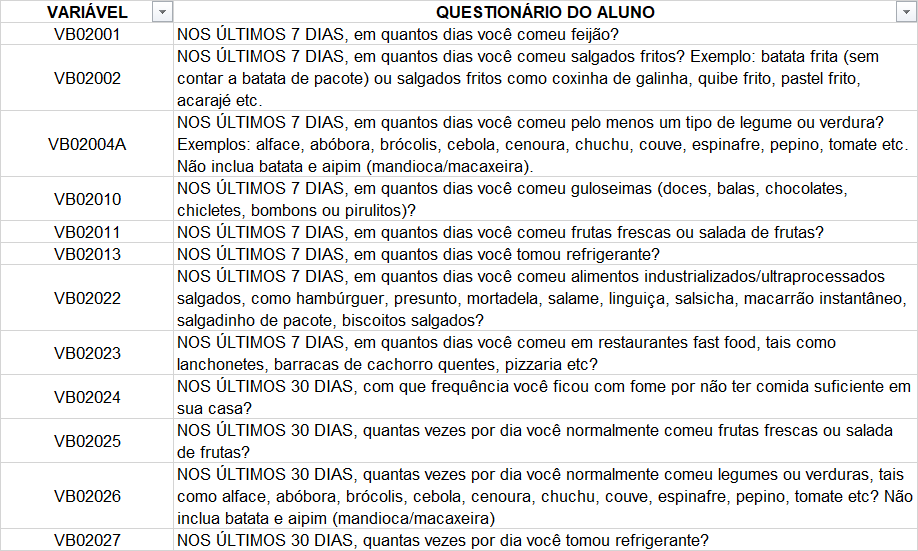

#### e através das respostas dos alunos, classificamos o tipo de hábito que ele possui para cada pergunta:

    -Não Saudável
    -Saudável 
    -Regular 
    -Não Informado


#### Algumas perguntas possuem alternativas diferentes para a resposta, com isso foi necessário realizar um mapeamento específico para cada grupo de perguntas.

Mapeamento 1

In [12]:
map_dict_positive7 = {1: 'n_saudavel', 2: 'n_saudavel', 3: 'n_saudavel', 4: 'regular', 5: 'regular', 6: 'regular', 7: 'saudavel', 8: 'saudavel', 99: 'n_informado'}
map_dict_negative7 = {1: 'saudavel', 2: 'saudavel', 3: 'regular', 4: 'regular', 5: 'regular', 6: 'n_saudavel', 7: 'n_saudavel', 8: 'n_saudavel', 99: 'n_informado'}


var_group1_positive7 = ['VB02001', 'VB02004A', 'VB02011']
var_group1_negative7 = ['VB02002','VB02010', 'VB02013', 'VB02022', 'VB02023']

for c in var_group1_positive7:
    df_9ano[c+'group'] = df_9ano[c].map(map_dict_positive7)

for c in var_group1_negative7:
    df_9ano[c+'group'] = df_9ano[c].map(map_dict_negative7)

In [13]:
df_9ano[df_9ano.columns[-8:]].head(2)

,VB02001group,VB02004Agroup,VB02011group,VB02002group,VB02010group,VB02013group,VB02022group,VB02023group
0,n_saudavel,regular,n_saudavel,regular,n_saudavel,regular,n_saudavel,saudavel
1,saudavel,saudavel,saudavel,regular,n_saudavel,saudavel,regular,regular


Mapamento 2

In [14]:
map_dict_VB02024 = {1: 'saudavel', 2: 'saudavel', 3: 'regular', 4: 'n_saudavel', 5: 'n_saudavel', 99: 'n_informado'}

df_9ano['VB02024group'] = df_9ano['VB02024'].map(map_dict_VB02024)

Mapamento 3

In [15]:
map_dict_positive30 = {1: 'n_saudavel', 2: 'regular', 3: 'regular', 4: 'saudavel', 5: 'saudavel', 6: 'regular', 7: 'saudavel', 99: 'n_informado'}
map_dict_negative30 = {1: 'saudavel', 2: 'regular', 3: 'regular', 4: 'n_saudavel', 5: 'n_saudavel', 6: 'n_saudavel', 7: 'n_saudavel', 99: 'n_informado'}


var_group1_positive30 = ['VB02025', 'VB02026']
var_group1_negative30 = ['VB02027']

for c in var_group1_positive30:
    df_9ano[c+'group'] = df_9ano[c].map(map_dict_positive30)

for c in var_group1_negative30:
    df_9ano[c+'group'] = df_9ano[c].map(map_dict_negative30)

In [16]:
df_9ano[df_9ano.columns[-4:]].head(2)

,VB02024group,VB02025group,VB02026group,VB02027group
0,saudavel,regular,regular,regular
1,saudavel,saudavel,saudavel,n_saudavel


In [17]:
lst_alimentares = var_group1_positive7 + var_group1_negative7 + ['VB02024'] + var_group1_positive30 + var_group1_negative30

## 2. b) Sumarização da classificação das perguntas por aluno

#### Aqui é calculada a frequência e razão das respostas (n_informado,	n_saudavel,	regular e saudavel) 

In [18]:
df_9ano_perc4 = pd.get_dummies(df_9ano[df_9ano.columns[-12:]], prefix='', prefix_sep='').groupby(level=0, axis=1).sum() 
df_9ano_perc4 = df_9ano_perc4.div(df_9ano_perc4.sum(axis=1), axis=0).multiply(100)
df_9ano_perc4.head()

,n_informado,n_saudavel,regular,saudavel
0,0.0,33.333333,50.000000,16.666667
1,0.0,16.666667,25.000000,58.333333
2,0.0,33.333333,33.333333,33.333333
3,0.0,16.666667,41.666667,41.666667
4,0.0,58.333333,16.666667,25.000000


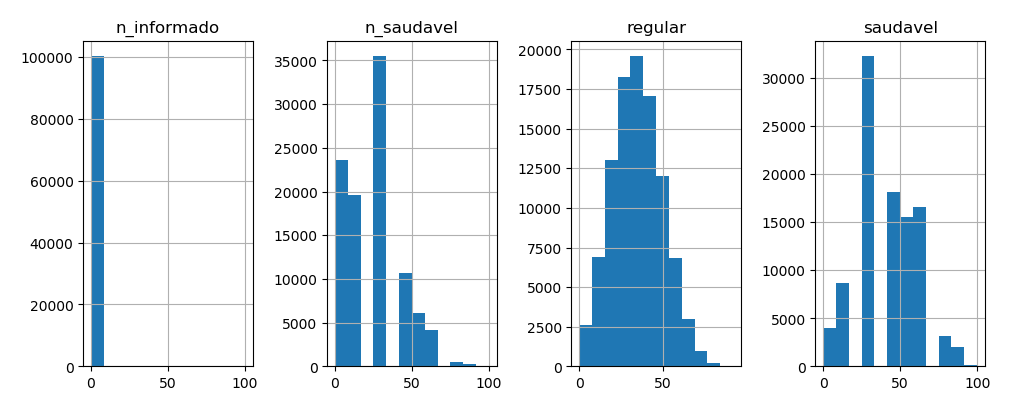

In [19]:
matplotlib.rcdefaults() 
fig, ax = plt.subplots(1, 4, constrained_layout=True, figsize=(10, 4))

m=0
for i in range(4):
    df_9ano_perc4.hist(column = df_9ano_perc4.columns[m], bins = 12, ax=ax[i])
    m+=1
        
plt.tight_layout()
plt.show()

#### Como o objetivo é identificar características dos hábitos alimentares desconsiderei as respostas com valor "n_informado" e recalculei a razão

In [20]:
df_9ano_perc3 = df_9ano_perc4[df_9ano_perc4.columns[-3:]].div(df_9ano_perc4[df_9ano_perc4.columns[-3:]].sum(axis=1), axis=0)

In [21]:
df_9ano_perc3.head()

,n_saudavel,regular,saudavel
0,0.333333,0.500000,0.166667
1,0.166667,0.250000,0.583333
2,0.333333,0.333333,0.333333
3,0.166667,0.416667,0.416667
4,0.583333,0.166667,0.250000


Adicionando as novas colunas ao dataframe alunos

In [22]:
df_9ano_perc3.columns = ['norm_n_saudavel','norm_regular','norm_saudavel']

df_9ano = pd.concat([df_9ano, df_9ano_perc4, df_9ano_perc3], axis=1)

df_9ano[df_9ano.columns[-16:]].head()

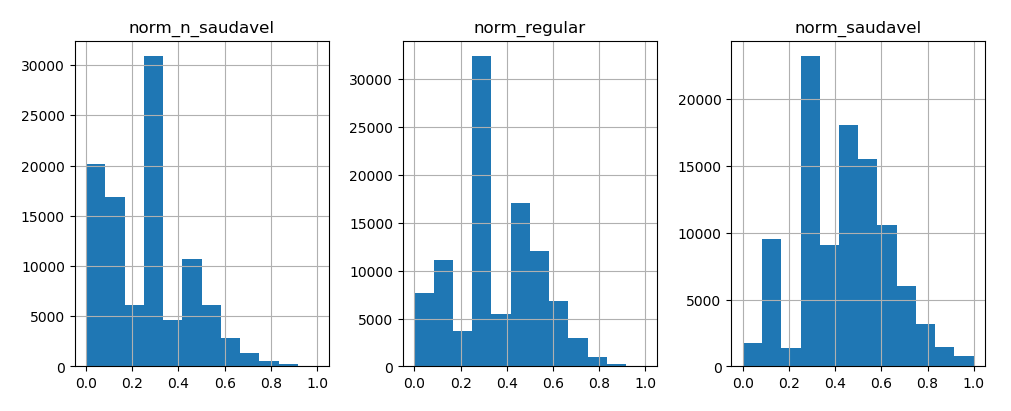

In [25]:
matplotlib.rcdefaults() 
fig, ax = plt.subplots(1, 3, constrained_layout=True, figsize=(10, 4))

m=0
for i in range(3):
    df_9ano_perc3.hist(column = df_9ano_perc3.columns[m], bins = 12, ax=ax[i])
    m+=1
        
plt.tight_layout()
plt.show()

## 2. c) Classificação do hábito alimentar dos alunos

#### Foi adotado o seguinte critério para a classificação do hábito alimentar dos alunos:
    2. Regular = Mesma proporção para saudavel, n_saudavel e regular ou Mais do que 33% das respostas das perguntas classificadas como "regular" 
    1. Saudável = Mais do que 33% das respostas das perguntas classificadas como "saudavel" 
    0. Não Saudavel = Mais do que 33% das respostas das perguntas classificadas como "n_saudavel" 


In [26]:
df_9ano['hab_alimentar'] = df_9ano.apply(lambda row: 2 if (row.norm_saudavel == row.norm_n_saudavel and row.norm_saudavel == row.norm_regular) else
                                                     1 if row.norm_saudavel >= 0.333333 else 
                                                     0 if row.norm_n_saudavel >= 0.333333 else
                                                     2, axis=1)

df_9ano['hab_alimentar'].value_counts()

1    69891
0    17161
2    13445
Name: hab_alimentar, dtype: int64

## 2. d) Seleção dos extremos

#### Como o foco é identificar caracteríticas que influenciam os hábitos alimentares, os alunos classificados como "regular" na análise anterior, serão excluídos da base que será utilizada no modelo a seguir.

In [27]:
df_9ano_model = df_9ano.loc[df_9ano['hab_alimentar'].isin([0,1])]
df_9ano_model['hab_alimentar'].value_counts()

1    69891
0    17161
Name: hab_alimentar, dtype: int64

#### Criei uma variável aleatória para utilizá-la como um ponto de corte, caso ela apareça entre as mais importantes na análise do modelo nos próximos passos.

In [28]:
import numpy as np
df_9ano_model['aleatoria']  = np.random.randint(1, 10, df_9ano_model.shape[0])

In [29]:
df_9ano_model.head()

,ANOPESQ,PAIS,REGEOGR,UFCENSO,MUNICIPIO_CAP,TIPO_MUNIC,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,VB02022,VB02023,VB02024,VB02025,VB02026,VB02027,VB03001A1,VB03001A2,VB03002A1,VB03002A2,VB03003A,VB03005A,VB03006A,VB03007,VB03008,VB03009A,VB03010A,VB03011A,TEMPODESLOC,TEMPOTOTAL,TEMPOEDFIS,TEMPOEXTRA,TEMPOEST,VB04001,VB04002,VB04003,VB04005,VB04006A,VB04008A,VB04009,VB04010,VB04011,VB05002,VB05003,VB05004,VB05005,VB05006A,VB05007,VB05009,VB05010,VB06001,VB06002,VB06003A,VB06004A,VB06005A,VB06006,VB07001,VB07002,VB07003,VB07004,VB07005,VB07006,VB07007,VB07008,VB07009,VB07010,VB08001,VB08002,VB08003A,VB08005,VB08006,VB08007,VB08008,VB08009,VB08010,VB08011,VB08012,VB08013,VB09001,VB09002,VB09003,VB09004,VB09005,VB09006A1,VB09006A2,VB09007A,VB09008,VB09009,VB09010,VB09011,VB09012,VB09013A,VB09014A,VB09015,VB09016,VB0901701,VB0901702,VB0901703,VB0901704,VB0901705,VB0901706,VB10001A,VB10002,VB10003,VB10004,VB10005,VB10006,VB11001,VB11002,VB11003,VB11004A,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,ESTRATO_EXP,ESTRATOGEOREG,PESO,aluno,escola,turma,VB02001group,VB02004Agroup,VB02011group,VB02002group,VB02010group,VB02013group,VB02022group,VB02023group,VB02024group,VB02025group,VB02026group,VB02027group,n_informado,n_saudavel,regular,saudavel,norm_n_saudavel,norm_regular,norm_saudavel,hab_alimentar,aleatoria
0,2015,76,1,11,1100205,1,1,2,1,14,2,7,1,2,7,4,2,-1,1,1,1,1,1,2,4,1,4,1,2,2,5,3,3,4,5,8,2,5,3,2,5,-1,2,8,2,1,2,3,3,2,6,1,1,2,1,1,-1,2,2,4,1,30.0,30.0,0.0,0.0,0.0,2,-1,-1,1,1,1,-1,-1,-1,1,13,1,1,1,1,1,3,2,-1,-1,-1,-1,6,1,5,1,1,4,5,1,-1,1,2,2,-1,-1,-1,-1,-1,1,1,3,-1,-1,-1,1,1,1,2,2,4,4,6,1,1,1,1,1,1,-1,3,2,-1,-1,-1,-1,-1,-1,5,2,3,4,5,5,3,1,2,2,2,4,3,2,4,3,1,2,3,5,2,-1,1,1,2,2,1,2,2,2,2,2,2,2,110020521,1100205,"3,738463",1,1,1787,n_saudavel,regular,n_saudavel,regular,n_saudavel,regular,n_saudavel,saudavel,saudavel,regular,regular,regular,0.0,33.333333,50.000000,16.666667,0.333333,0.500000,0.166667,0,5
1,2015,76,1,11,1100205,1,1,1,4,16,2,5,1,1,7,3,2,-1,1,1,1,1,1,1,3,1,4,1,1,2,5,3,8,3,8,8,7,2,1,5,1,5,1,3,5,1,7,4,5,8,1,2,-1,2,6,7,7,5,6,3,7,105.0,540.0,45.0,390.0,360.0,2,-1,-1,1,1,4,-1,-1,6,2,1,-1,-1,-1,-1,-1,2,2,-1,-1,-1,-1,2,1,4,3,4,3,3,2,7,2,1,1,12,6,1,1,1,2,1,1,1,1,-1,1,1,1,1,2,6,5,3,3,3,2,8,2,1,-1,2,2,-1,-1,-1,-1,-1,-1,6,2,4,5,5,5,3,4,2,2,2,1,1,1,1,4,1,10,2,1,1,12,1,-1,2,2,2,2,2,1,2,2,2,2,110020521,1100205,"3,738463",2,1,1787,saudavel,saudavel,saudavel,regular,n_saudavel,saudavel,regular,regular,saudavel,saudavel,saudavel,n_saudavel,0.0,16.666667,25.000000,58.333333,0.166667,0.250000,0.583333,1,9
3,2015,76,1,11,1100205,1,1,1,4,14,11,6,1,2,7,4,2,-1,2,1,1,1,1,2,4,2,4,1,2,2,5,3,8,4,1,2,8,4,1,5,5,-1,2,4,2,1,3,2,4,1,3,-1,3,2,6,8,7,4,2,1,8,50.0,550.0,45.0,455.0,420.0,2,-1,-1,1,1,1,-1,-1,-1,1,13,1,1,1,1,1,2,2,-1,-1,-1,-1,1,1,5,3,3,1,5,1,-1,1,2,2,-1,-1,-1,-1,-1,1,1,2,-1,-1,-1,1,1,1,2,2,6,5,1,1,1,1,1,1,1,-1,2,2,-1,-1,-1,-1,-1,-1,5,2,3,4,4,4,4,2,2,2,2,3,4,2,1,4,1,2,1,1,2,5,1,-1,2,2,2,2,2,2,1,2,2,2,110020521,1100205,"3,738463",4,1,1787,saudavel,n_saudavel,saudavel,regular,saudavel,regular,regular,saudavel,saudavel,regular,regular,n_saudavel,0.0,16.666667,41.666667,41.666667,0.166667,0.416667,0.416667,1,5
4,2015,76,1,11,1100205,1,1,1,1,14,12,6,2,1,5,2,2,-1,1,1,1,1,2,2,3,2,4,1,2,2,6,3,2,8,7,8,1,8,5,4,5,-1,2,8,1,1,1,6,2,1,1,-1,-1,1,-1,1,-1,2,2,9,1,0.0,0.0,0.0,0.0,0.0,2,-1,-1,3,1,1,-1,-1,-1,2,1,-1,-1,-1,-1,-1,2,2,-1,-1,-1,-1,1,2,4,3,4,2,4,2,7,1,1,2,-1,-1,-1,-1,-1,3,1,2,-1,-1,-1,1,1,1,2,2,2,2,1,1,1,1,1,1,8,9,1,2,-1,-1,-1,-1,-1,-1,3,2,1,1,5,3,4,2,2,2,2,3,4,4,2,4,2,-1,3,3,2,-1,1,-1,2,2,2,2,2,2,2,1,2,2,110020521,1100205,"3,738

# 3. Identificação de características relacionadas aos hábitos alimentares dos alunos

#### A proposta adotada foi construir um modelo de combinação de árvores básico e avaliar as variáveis mais importantes para classificação dos alunos em "saudáveis" e "não saudáveis".

## 3. a) Construção do modelo

#### Foi utilizado o Light GBM como algoritmo de classificação, devido à sua velocidade de treinamento, pode de predição e facilidade de interpretabilidade

In [129]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

cols = list(set(columns) - set(['ANOPESQ','PAIS','REGEOGR','UFCENSO','MUNICIPIO_CAP','TIPO_MUNIC','TEMPOEDFIS','TEMPODESLOC','ESTRATO_EXP','ESTRATOGEOREG','TEMPOEXTRA','TEMPOTOTAL','TEMPOEST','aluno','PESO','escola','turma','VB09006A1','VB09006A2','VB01004'] + lst_alimentares))

cols.append('aleatoria')
df = df_9ano_model[cols]
y = df_9ano_model['hab_alimentar']

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42, stratify=y_train)


In [132]:
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)
test_data = lgb.Dataset(X_test, label=y_test)

In [133]:
%%time
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 20,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0}

model = lgb.train(parameters, num_boost_round=5000, train_set=train_data, valid_sets=[train_data, val_data], valid_names=['train_data','val_data'],verbose_eval=50, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds.
[50]	train_data's auc: 0.756098	val_data's auc: 0.730279
[100]	train_data's auc: 0.772225	val_data's auc: 0.737624
[150]	train_data's auc: 0.782966	val_data's auc: 0.740803
[200]	train_data's auc: 0.792463	val_data's auc: 0.743273
[250]	train_data's auc: 0.801624	val_data's auc: 0.743785
[300]	train_data's auc: 0.80902	val_data's auc: 0.743987
[350]	train_data's auc: 0.816524	val_data's auc: 0.743984
[400]	train_data's auc: 0.822989	val_data's auc: 0.743402
[450]	train_data's auc: 0.829968	val_data's auc: 0.742965
Early stopping, best iteration is:
[358]	train_data's auc: 0.817612	val_data's auc: 0.744197
Wall time: 7.69 s


In [143]:
y_proba = model.predict(X_test)

for i in range(0,X_test.shape[0]):
    if (y_pred[i] >= 0.5):
        y_pred[i] = 1
    else:
        y_pred[i] =0
len(y_pred) 

13058

In [149]:
y_test.value_counts()

1    10484
0     2574
Name: hab_alimentar, dtype: int64

## 3. b) Avaliação do modelo

In [144]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[1746,  828],
       [3178, 7306]], dtype=int64)

Necessário analisar com maior profundidade os ~3.200 casos de Falso Positivo, indicados na matriz de confusão, dado a proposta do case, isso não será realizado.

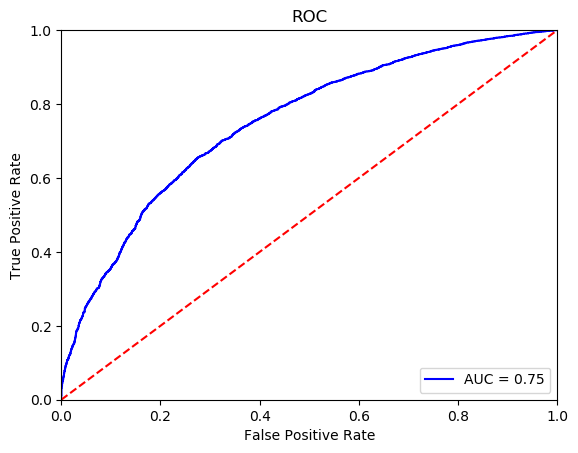

In [147]:
import sklearn.metrics as metrics
preds = y_proba
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Mesmo com a necessidade de redução dos Falsos Postivos, o modelo aprensenta um resultado satisfatório considerando o AUC (0.75) como métrica de avaliação.

## 3. c) Análise das variáveis mais importantes

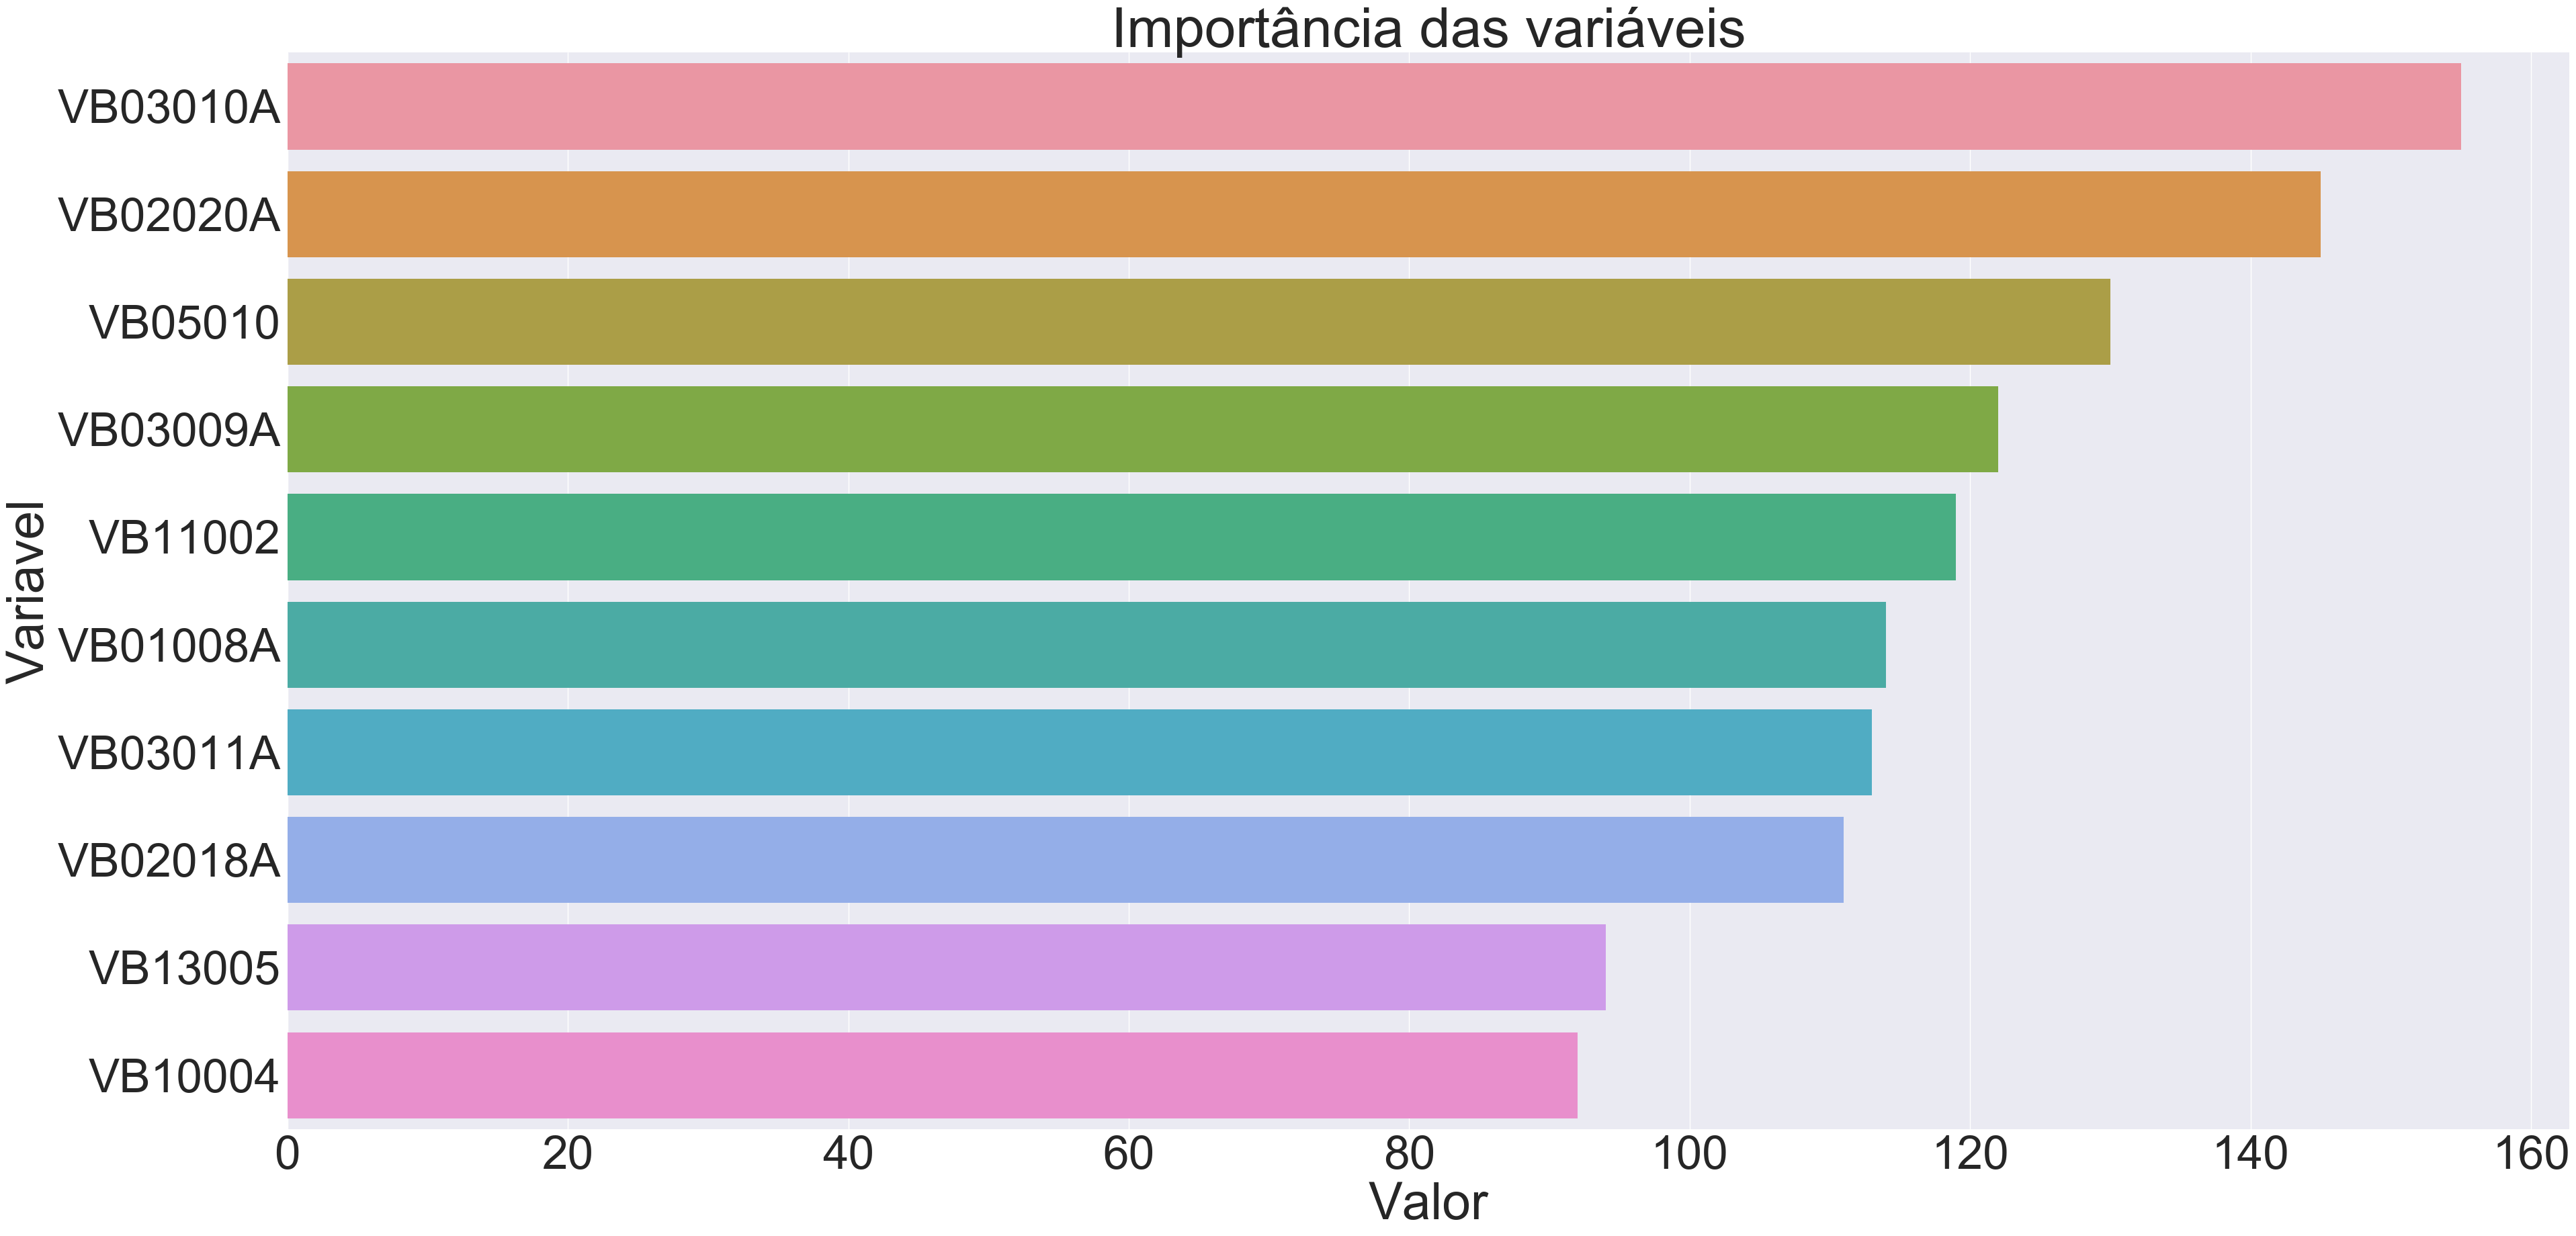

In [148]:
import seaborn as sns

top_n = 10
feature_imp = pd.DataFrame(sorted(zip(model.feature_importance(),X_train.columns)), 
                           columns=['Valor','Variavel'])
plt.figure(figsize=(40, 20))
sns.set(font_scale = 5)
sns.barplot(x="Valor",y="Variavel",data=feature_imp.sort_values(by="Valor",ascending=False)[0:top_n])
plt.title('Importância das variáveis')
plt.tight_layout()
plt.show()


In [150]:
df_metadados = pd.read_excel(mypath+'\\META_DADOS.xlsx')

feature_imp_comp = feature_imp.set_index('Variavel').join(df_metadados.set_index('variavel')).reset_index()

pd.set_option('max_colwidth', 1000)



Avaliando as top 10 variáveis (perguntas) mais importantes

In [151]:
feature_imp_comp.sort_values(by="Valor", ascending=False).head(10)

,index,Valor,pergunta,fonte
40,VB03010A,155,"Em um dia de semana comum, quanto tempo você fica sentado(a), assistindo televisão, usando computador, jogando videogame, conversando com amigos(as) ou fazendo outras atividades sentado(a)? (não contar sábado, domingo, feriados e o tempo sentado na escola)",aluno
28,VB02020A,145,Você costuma comer a comida (merenda/almoço) oferecida pela escola? (Não considerar lanches/comida comprados na cantina).,aluno
58,VB05010,130,Quantos amigos seus consomem bebida alcoólica?,aluno
39,VB03009A,122,"Em um dia de semana comum, quantas horas por dia você assiste a TV? (não contar sábado, domingo e feriado)",aluno
115,VB11002,119,O que você está fazendo em relação a seu peso?,aluno
7,VB01008A,114,Qual nível de ensino (grau) sua mãe estudou ou estuda?,aluno
41,VB03011A,113,"NOS ÚLTIMOS 7 DIAS, em quantos dias você fez atividade física por pelo menos 60 minutos (1 hora) por dia? (Some todo o tempo que você gastou em qualquer tipo de atividade física EM CADA DIA)",aluno
26,VB02018A,111,Você costuma comer quando está assistindo à TV ou estudando?,aluno
127,VB13005,94,Como você classificaria seu estado de saúde?,aluno
111,VB10004,92,"NOS ÚLTIMOS 30 DIAS, com que frequência você lavou as mãos antes de comer?",aluno


Avaliando as top 10 variáveis (perguntas) mais importantes, com seus respectivos valores (respostas) distríbuídos percentualmente (de 0 a 100) entre saudavéis e não saudáveis

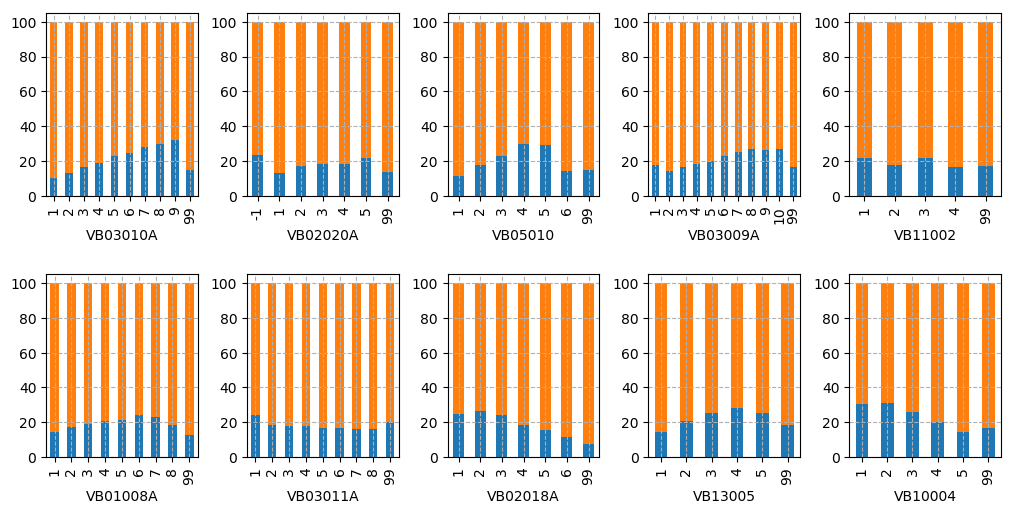

In [152]:
matplotlib.rcdefaults() 
fig, ax = plt.subplots(2, 5, constrained_layout=True, figsize=(10, 5))

list_c = feature_imp_comp.sort_values(by="Valor", ascending=False).head(10)['index'].values.tolist()
n=0
for i in range(2):
    for j in range(5):
        counter = df_9ano_model.groupby(list_c[n])['hab_alimentar'].value_counts().unstack()
        percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)
        percentage_dist.plot.bar(stacked=True, ax=ax[i,j], legend=False)
        #plt.grid(b=True, which='major', linestyle='--')
        n= n+1

        ax[i,j].grid(b=True, which='major', linestyle='--')
        
fig.set_constrained_layout_pads(w_pad=2./72., h_pad=2./72., hspace=0.09)  

plt.show()


Com base na análise gráfica acima, apresentamos um detalhamento para as variáveis que apresentam maior variação visualmente, são elas (1. VB03010A, 3. VB05010, 6. VB01008A, 8. VB02018A e 10. VB10004)


## 3. d) Análise das variáveis mais importantes

#### Com base na análise gráfica acima, apresentamos um detalhamento para as variáveis que apresentam maior variação visualmente, são elas (1. VB03010A, 3. VB05010, 6. VB01008A, 8. VB02018A e 10. VB10004)

In [153]:
def plot_feature(column):
    matplotlib.rcdefaults() 
    counter = df_9ano_model.groupby(column)['hab_alimentar'].value_counts().unstack()
    percentage_dist = 100 * counter.divide(counter.sum(axis = 1), axis = 0)
    percentage_dist.plot.bar(stacked=True, figsize=(8, 2))
    plt.grid(b=True, which='major', linestyle='--')
    plt.show()

In [154]:
#feature_imp_comp.sort_values(by="Valor", ascending=False).head(10)['index']

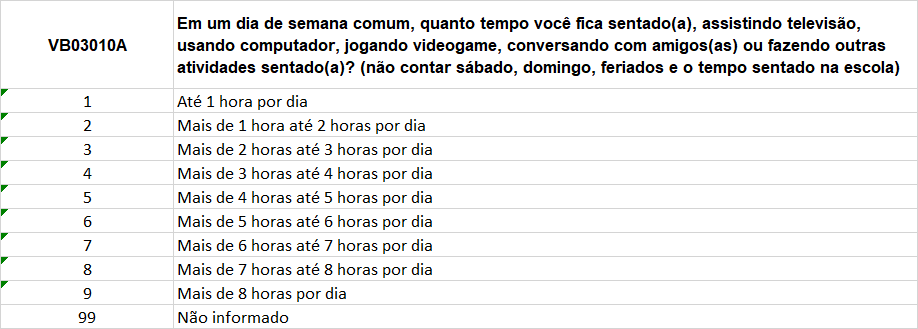

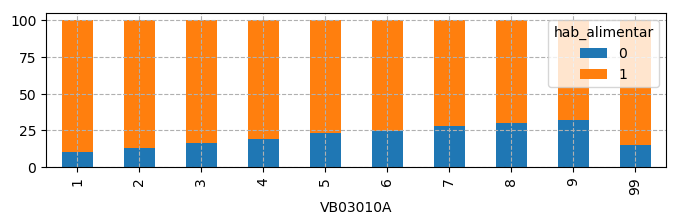

In [155]:
plot_feature('VB03010A')

No gráfico acima podemos observar que quanto maior o tempo realizando alguma atividade sentado do grupo (resposta), maior a percentual de alunos "não saudáveis" no grupo.

Hipótese: Alunos com aspectos sedentários, demonstram uma falta de conhecimento ou falta de interesse em aspectos relacionados à saude.

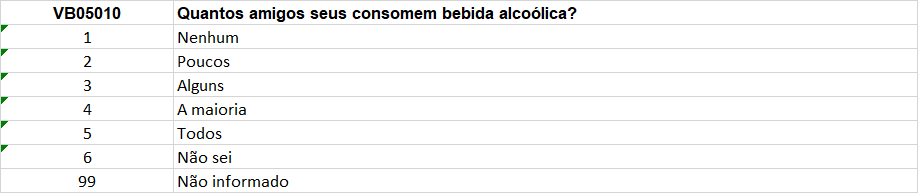

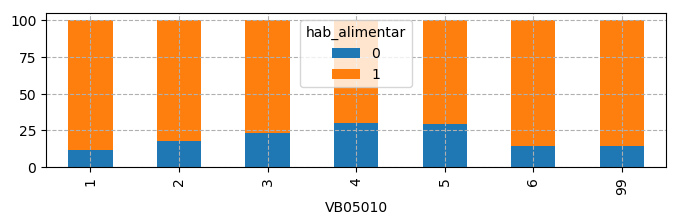

In [156]:
plot_feature('VB05010')

No gráfico acima podemos observar que os grupos de alunos que possuem alguns ou maioria dos amigos consumidores de bebida alcoólica tem um maior percentual de alunos "não saudáveis" no grupo.

Hipótese: Alunos com amigos consumidores de bebidas alcoólicas, podem também consumir. Nesses grupos de alunos tão jovens já existe o consumo desse tipo de bebidas, eles provavelmente não se preocupam com a saúde e alimentação.

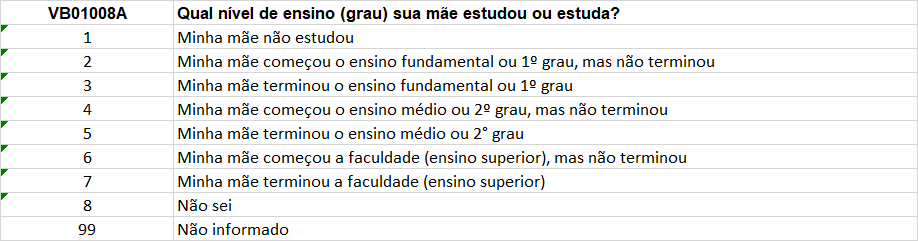

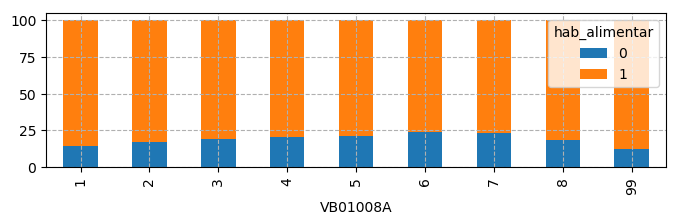

In [157]:
plot_feature('VB01008A')

No gráfico acima podemos observar que os grupos de alunos que possuem mães com maior grau de escolaridade, tem um maior percentual de alunos "não saudáveis" no grupo.

Hipótese: Alunos onde a mãe tem um grau de escolaridade menor, tem uma probabilidade maior de serem donas de casa e consequentemente cozinham todos os dias, mantendo uma rotina.

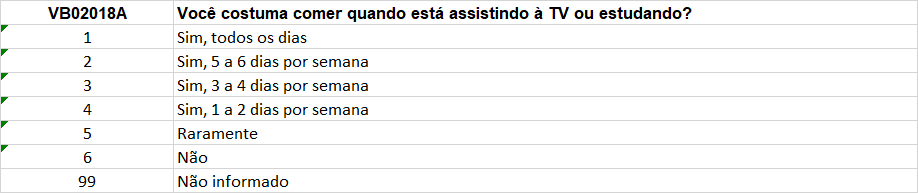

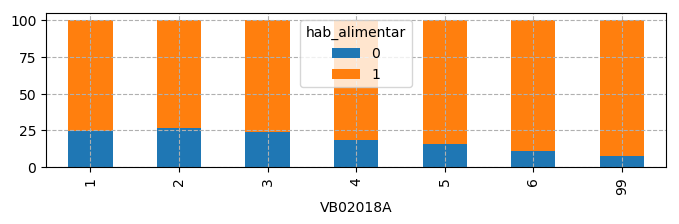

In [158]:
plot_feature('VB02018A')

No gráfico acima podemos observar que quanto maior o costume (frequência) de ingestão de alimentos assistindo à TV, maior a percentual de alunos "não saudáveis" no grupo.

Hipótese: Alunos que comem realizando outra atividade, provavelmene estão comendo algum alimento industrializado, que seja de fácil e rápido consumo.

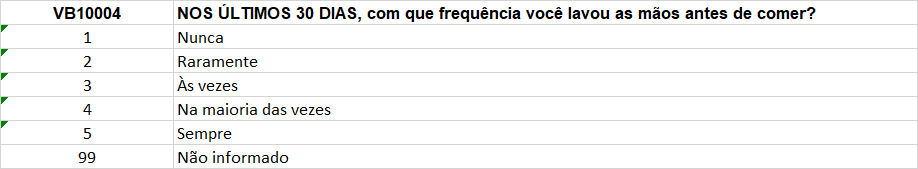

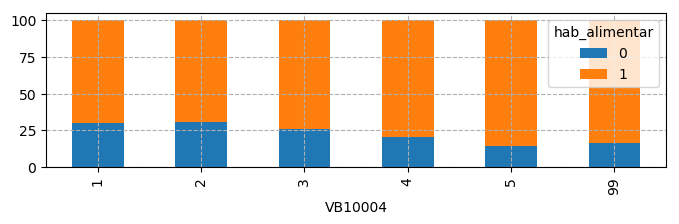

In [159]:
plot_feature('VB10004')

No gráfico acima podemos observar que quanto maior o costume (frequência) de lavar as mãos antes de comer, maior a percentual de alunos "saudáveis" no grupo.

Hipótese: Alunos com o costume de lavar as mãos antes de comer, representam uma possível educação alimentar mais sólida do que os outros.

# 4. Conclusões

Observando apenas 5 variáveis de uma forma mais detalhada, foi possível entender melhor o hábito alimentar de um aluno através de características como: atividades rotineiras, relacionamento com amigos, nível de escolaridade da família (mãe) e higiene. 

# 5. Trabalhos futuros


Realizar uma análise mais detalhada combinando as variáveis que em uma visão unitária, não discriminaram significativamente os grupos. 

Uma sugestão seria analisar as top n árvores com maior probabilidade de acerto e verificar quais foram os caminhos (combinações) mais frequentes para cada uma das classes, assim haveria a possibilidade de identificar combinações extremamente importantes entre as diversas variáveis.

Outra sugestão seria realizar uma análise por grupos, como por exemplo, por Estado, Município, Esfera administrativa da escola, Dependencia administrativa da escola, Situação da escola, entre outros.

Além disso, estratégias de balanceamento das classes, tunning de hiperparâmetos e feature engineering poderiam ser aplicados, a fim de buscar uma melhor performance do modelo.